In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the Dataset
# Replace with the actual path to your dataset
data = pd.read_csv('C:\\Users\\sanjh\\Downloads\\Advertising.csv', encoding='latin1')

# Inspect the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())

# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(data.describe())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Statistical Summary:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000

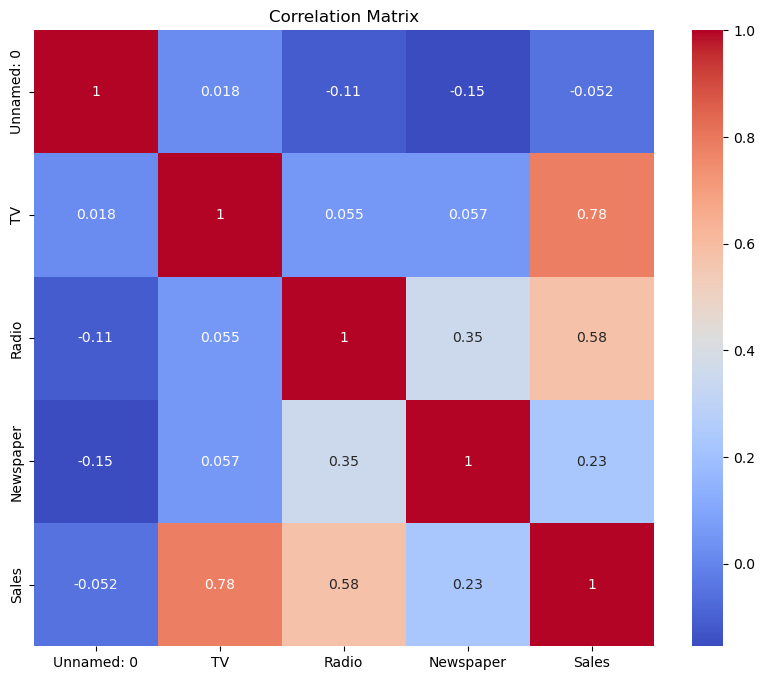

In [10]:
# Visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



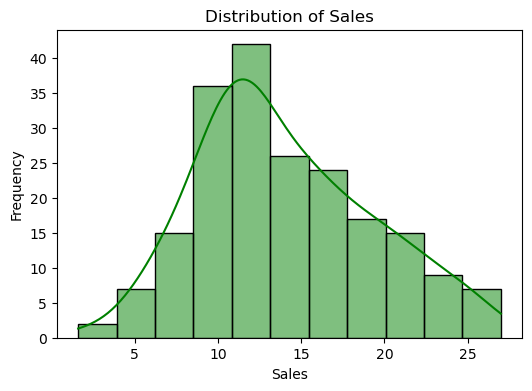

In [11]:
# Distribution of the target variable (Sales)
plt.figure(figsize=(6, 4))
sns.histplot(data['Sales'], kde=True, color='green')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



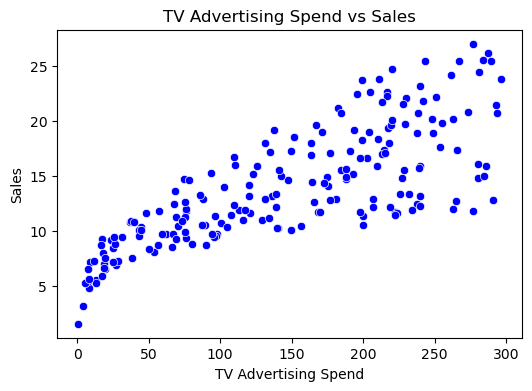

In [12]:
# Scatterplot: advertising spend vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['TV'], y=data['Sales'], color='blue')
plt.title('TV Advertising Spend vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

# Step 3: Data Preprocessing
# Identify features and target variable
X = data.drop('Sales', axis=1)  # Use 'Sales' instead of 'sales'
y = data['Sales']  # Use 'Sales' instead of 'sales'

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [13]:
# Step 4: Model Training with Pipeline
# Create a pipeline with preprocessing and a regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Model Performance:
Mean Squared Error: 0.5661956999999993
R-squared Score: 0.9792637311223106


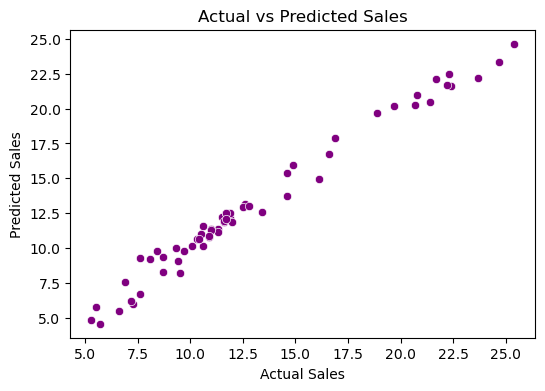

In [14]:

# Visualize actual vs predicted sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Step 6: Save the Model (Optional)
import pickle
with open('sales_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)
